In [3]:
# Description: Overfits a YOLO model on 100 images, logs everything to Comet ML.
import comet_ml  
from ultralytics import YOLO

comet_ml.login(project_name="yolo11-flickr")
experiment = comet_ml.Experiment(project_name="yolo11-flickr")
experiment.set_name("overfit_test")

model = YOLO("yolo11n.pt")

results = model.train(
    data="flickr_sanity.yaml",
    project="yolo11-flickr",
    name="overfit_test",
    exist_ok=True,
    epochs=100,
    batch=16,
)


COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/aiigoradam/yolo11-flickr/b3583f25c981433d884359f0ac811d3c



New https://pypi.org/project/ultralytics/8.3.70 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.62  Python-3.9.21 torch-2.5.1 CUDA:0 (NVIDIA GeForce GTX 1080, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=flickr_sanity.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=yolo11-flickr, name=overfit_test, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False,

COMET WARNING: Unknown error exporting current conda environment
COMET WARNING: Unknown error retrieving Conda package as an explicit file
COMET WARNING: Unknown error retrieving Conda information


YOLO11n summary: 319 layers, 2,590,230 parameters, 2,590,214 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed 


train: Scanning C:\Users\stopc\Desktop\CV_Project\datasets\flickr\labels\val.cache... 140 images, 0 backgrounds, 0 corrupt: 100%|██████████| 140/140 [00:00<?, ?it/s]
val: Scanning C:\Users\stopc\Desktop\CV_Project\datasets\flickr\labels\val.cache... 140 images, 0 backgrounds, 0 corrupt: 100%|██████████| 140/140 [00:00<?, ?it/s]


Plotting labels to yolo11-flickr\overfit_test\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to yolo11-flickr\overfit_test
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.63G     0.8069      2.876      1.272         57        640: 100%|██████████| 9/9 [00:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.03it/s]

                   all        140        234    0.00586      0.993       0.47      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.63G     0.8298      2.601      1.262         45        640: 100%|██████████| 9/9 [00:03<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]

                   all        140        234    0.00575      0.997      0.761      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.67G     0.7742       2.19      1.255         43        640: 100%|██████████| 9/9 [00:03<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.99it/s]


                   all        140        234    0.00557      0.987      0.778      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.65G     0.9222      1.931      1.362         39        640: 100%|██████████| 9/9 [00:04<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]

                   all        140        234     0.0831      0.961      0.807      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.64G     0.9327      1.724       1.35         52        640: 100%|██████████| 9/9 [00:04<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.99it/s]

                   all        140        234          1     0.0256      0.597      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.65G      1.015      1.634      1.407         53        640: 100%|██████████| 9/9 [00:04<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]


                   all        140        234      0.812      0.288      0.651      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.65G      1.015      1.661      1.403         42        640: 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.93it/s]

                   all        140        234      0.726      0.362      0.499      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.65G     0.9975      1.525      1.395         40        640: 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.21it/s]

                   all        140        234      0.484       0.38      0.453      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.66G      1.062       1.54      1.425         54        640: 100%|██████████| 9/9 [00:03<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.17it/s]

                   all        140        234       0.54      0.477      0.496      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.64G      1.002      1.472      1.375         35        640: 100%|██████████| 9/9 [00:04<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.09it/s]

                   all        140        234      0.632      0.442      0.478      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.62G      1.081      1.523      1.408         57        640: 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]

                   all        140        234      0.517      0.412      0.466      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.62G      1.067      1.493      1.395         57        640: 100%|██████████| 9/9 [00:03<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.15it/s]

                   all        140        234      0.333      0.449      0.345       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.66G      1.045      1.517      1.439         39        640: 100%|██████████| 9/9 [00:03<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.21it/s]


                   all        140        234      0.507      0.487      0.518       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.65G      1.035      1.505      1.389         55        640: 100%|██████████| 9/9 [00:02<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.27it/s]


                   all        140        234       0.52      0.489      0.529      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.67G      1.086      1.483       1.42         53        640: 100%|██████████| 9/9 [00:03<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.45it/s]

                   all        140        234      0.527      0.609      0.603      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.61G      1.113      1.441       1.45         40        640: 100%|██████████| 9/9 [00:03<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.53it/s]

                   all        140        234      0.773      0.584       0.69      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.67G      1.063      1.463      1.414         57        640: 100%|██████████| 9/9 [00:03<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        140        234       0.68      0.583      0.618      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.61G      1.047      1.479       1.42         41        640: 100%|██████████| 9/9 [00:03<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]

                   all        140        234      0.635      0.605      0.686      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.66G      1.036      1.352      1.412         51        640: 100%|██████████| 9/9 [00:03<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.28it/s]


                   all        140        234      0.702      0.606      0.702      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.62G      1.053       1.32      1.398         57        640: 100%|██████████| 9/9 [00:03<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.20it/s]

                   all        140        234      0.666       0.66      0.678      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.65G     0.9658      1.306      1.358         61        640: 100%|██████████| 9/9 [00:03<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.00it/s]


                   all        140        234      0.575      0.666      0.673      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.65G     0.9642      1.305      1.347         40        640: 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.52it/s]

                   all        140        234       0.62      0.678      0.666       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.66G      1.022      1.341      1.418         61        640: 100%|██████████| 9/9 [00:03<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.72it/s]

                   all        140        234      0.704       0.71      0.741      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.66G     0.9443      1.266      1.322         48        640: 100%|██████████| 9/9 [00:03<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.68it/s]

                   all        140        234      0.651      0.682      0.733      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.66G     0.9318      1.249      1.345         48        640: 100%|██████████| 9/9 [00:04<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        140        234      0.778      0.661      0.785       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.66G     0.8994      1.316      1.318         43        640: 100%|██████████| 9/9 [00:06<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]

                   all        140        234      0.848      0.681       0.81      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.66G     0.9286      1.216      1.327         54        640: 100%|██████████| 9/9 [00:05<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        140        234      0.758      0.656      0.742      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.61G     0.9265      1.153      1.291         36        640: 100%|██████████| 9/9 [00:03<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.25it/s]


                   all        140        234      0.751      0.578      0.716      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.67G     0.9459      1.163      1.324         67        640: 100%|██████████| 9/9 [00:04<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.08it/s]

                   all        140        234      0.736      0.721       0.79       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.62G     0.8553      1.082      1.274         49        640: 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.04it/s]

                   all        140        234      0.779      0.745       0.81      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.65G      0.919      1.117       1.32         46        640: 100%|██████████| 9/9 [00:03<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

                   all        140        234       0.79      0.742       0.79      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       2.6G     0.8714      1.116      1.266         53        640: 100%|██████████| 9/9 [00:05<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        140        234       0.76       0.77      0.831      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.66G     0.9113      1.141      1.314         59        640: 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]

                   all        140        234       0.84       0.67      0.802      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.66G     0.8977      1.138      1.292         35        640: 100%|██████████| 9/9 [00:06<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]

                   all        140        234      0.802      0.753      0.816      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.65G     0.8559      1.087      1.247         30        640: 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.11it/s]

                   all        140        234      0.816      0.787      0.857      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.61G     0.8662      1.055      1.273         53        640: 100%|██████████| 9/9 [00:03<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]

                   all        140        234      0.831      0.743       0.87      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.67G     0.8172      1.027      1.236         46        640: 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.30it/s]

                   all        140        234      0.842      0.759      0.877       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.64G     0.8849      1.061      1.283         52        640: 100%|██████████| 9/9 [00:04<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]

                   all        140        234      0.875      0.841      0.916      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.65G     0.8364     0.9632      1.261         40        640: 100%|██████████| 9/9 [00:03<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]


                   all        140        234      0.809      0.876      0.912      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.63G     0.8668     0.9992      1.272         48        640: 100%|██████████| 9/9 [00:03<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.70it/s]

                   all        140        234      0.834       0.82      0.918      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.66G     0.8011     0.9824      1.219         51        640: 100%|██████████| 9/9 [00:05<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]

                   all        140        234      0.897      0.862      0.939      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.68G     0.8321          1      1.257         45        640: 100%|██████████| 9/9 [00:03<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.76it/s]

                   all        140        234      0.865      0.901      0.929      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.67G     0.7734     0.9476       1.18         42        640: 100%|██████████| 9/9 [00:03<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]


                   all        140        234      0.865      0.893      0.924      0.747

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.61G     0.7396     0.8923      1.181         53        640: 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.30it/s]

                   all        140        234      0.922      0.819      0.941      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.67G     0.7834     0.9296      1.208         49        640: 100%|██████████| 9/9 [00:04<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.27it/s]

                   all        140        234      0.903      0.881      0.958      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       2.6G      0.739     0.8772      1.179         42        640: 100%|██████████| 9/9 [00:04<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]

                   all        140        234      0.853      0.925      0.953      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.64G     0.7382     0.8416      1.157         58        640: 100%|██████████| 9/9 [00:04<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        140        234      0.921      0.902      0.958      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.62G     0.7202     0.8267      1.159         49        640: 100%|██████████| 9/9 [00:03<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.94it/s]


                   all        140        234      0.879      0.889      0.958      0.811

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.66G     0.7593     0.8551      1.221         36        640: 100%|██████████| 9/9 [00:03<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        140        234      0.929      0.927      0.975      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.68G     0.7308     0.8053      1.149         56        640: 100%|██████████| 9/9 [00:04<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.54it/s]

                   all        140        234      0.906      0.911       0.96      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.64G     0.7795      0.857      1.203         48        640: 100%|██████████| 9/9 [00:04<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.65it/s]

                   all        140        234      0.852      0.865       0.93      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.62G      0.744     0.8527      1.181         47        640: 100%|██████████| 9/9 [00:03<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.82it/s]


                   all        140        234      0.922      0.898      0.964       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.66G     0.7368     0.8354      1.154         54        640: 100%|██████████| 9/9 [00:04<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.09it/s]

                   all        140        234      0.923      0.942      0.976      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.66G     0.7064     0.7941      1.158         56        640: 100%|██████████| 9/9 [00:04<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all        140        234      0.901      0.938      0.971      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.65G     0.7027     0.7708      1.154         56        640: 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.20it/s]

                   all        140        234      0.924      0.923      0.967      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.61G     0.7205     0.8233      1.169         55        640: 100%|██████████| 9/9 [00:04<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]

                   all        140        234      0.962      0.912      0.976      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.65G     0.6524     0.7687      1.143         47        640: 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.74it/s]


                   all        140        234      0.964      0.921      0.976      0.867

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.65G     0.7155     0.7713      1.168         49        640: 100%|██████████| 9/9 [00:04<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.67it/s]

                   all        140        234      0.946      0.928      0.978      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.66G      0.629     0.7093      1.101         51        640: 100%|██████████| 9/9 [00:04<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.96it/s]

                   all        140        234      0.948      0.947      0.983      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.66G     0.6895     0.7673      1.164         43        640: 100%|██████████| 9/9 [00:05<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.05it/s]

                   all        140        234      0.965      0.973      0.987      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.65G     0.6288     0.7435      1.124         64        640: 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.89it/s]

                   all        140        234       0.97      0.966       0.99      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.66G     0.6476     0.7595      1.114         56        640: 100%|██████████| 9/9 [00:03<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]

                   all        140        234      0.993      0.972      0.991      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.62G     0.6408     0.6931      1.111         49        640: 100%|██████████| 9/9 [00:03<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.72it/s]

                   all        140        234       0.99      0.966      0.988      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.62G     0.6242     0.7128      1.126         46        640: 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.06it/s]


                   all        140        234      0.977      0.976       0.99      0.903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.66G     0.5788     0.6852      1.086         51        640: 100%|██████████| 9/9 [00:04<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        140        234      0.972      0.964      0.983        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.66G     0.5851     0.7042      1.096         46        640: 100%|██████████| 9/9 [00:04<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.19it/s]

                   all        140        234      0.974      0.967      0.985      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.65G     0.6277     0.7276      1.113         52        640: 100%|██████████| 9/9 [00:05<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.49it/s]

                   all        140        234       0.98      0.963      0.984      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.62G     0.5706     0.6966      1.076         36        640: 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.13it/s]

                   all        140        234      0.973       0.97      0.987      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.65G     0.5699     0.6823       1.09         58        640: 100%|██████████| 9/9 [00:04<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.93it/s]

                   all        140        234      0.977      0.954      0.988      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.66G      0.601     0.6619       1.11         49        640: 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.85it/s]


                   all        140        234      0.989      0.969      0.994      0.927

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.65G     0.5685     0.6635      1.074         51        640: 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.72it/s]

                   all        140        234      0.971      0.989      0.993      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.65G     0.5577     0.6667      1.085         52        640: 100%|██████████| 9/9 [00:03<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.84it/s]

                   all        140        234      0.987      0.983      0.993      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.67G     0.5744     0.6537      1.091         46        640: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]

                   all        140        234      0.989      0.989      0.994      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.62G     0.5902     0.6748        1.1         36        640: 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.95it/s]


                   all        140        234      0.988      0.987      0.994      0.937

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.65G     0.5907      0.633      1.109         43        640: 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.88it/s]

                   all        140        234      0.986      0.981      0.994      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.62G     0.5074     0.5865      1.036         48        640: 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]

                   all        140        234      0.963      0.967      0.993      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.67G     0.5477     0.6116      1.049         50        640: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.68it/s]

                   all        140        234      0.979      0.957      0.993      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.62G     0.5598     0.6085       1.07         51        640: 100%|██████████| 9/9 [00:03<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        140        234       0.97      0.974      0.994      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.65G     0.5441     0.5857      1.072         40        640: 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]

                   all        140        234      0.975      0.967      0.994      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.62G     0.5548     0.5832      1.062         43        640: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.86it/s]

                   all        140        234      0.975      0.993      0.994      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.65G     0.5885     0.6313      1.098         52        640: 100%|██████████| 9/9 [00:04<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]

                   all        140        234      0.988      0.975      0.993      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.66G     0.5472     0.5891      1.071         35        640: 100%|██████████| 9/9 [00:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.97it/s]

                   all        140        234      0.995       0.98      0.994      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.65G     0.5319     0.5737      1.062         61        640: 100%|██████████| 9/9 [00:03<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.72it/s]

                   all        140        234      0.996      0.987      0.995      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.66G     0.4887     0.5552      1.023         51        640: 100%|██████████| 9/9 [00:03<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.63it/s]

                   all        140        234      0.995      0.993      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.65G     0.5421     0.5942      1.077         50        640: 100%|██████████| 9/9 [00:05<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]

                   all        140        234      0.984      0.998      0.995      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.66G     0.5074     0.5733      1.037         53        640: 100%|██████████| 9/9 [00:04<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.95it/s]

                   all        140        234      0.984      0.996      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.64G     0.5044     0.5922      1.063         38        640: 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]

                   all        140        234      0.991      0.997      0.995      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.66G     0.5132     0.5513      1.049         46        640: 100%|██████████| 9/9 [00:03<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.81it/s]

                   all        140        234      0.984       0.99      0.994      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.65G     0.4884     0.5168      1.033         50        640: 100%|██████████| 9/9 [00:04<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]

                   all        140        234      0.987      0.993      0.994      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.66G     0.4917     0.5181      1.047         59        640: 100%|██████████| 9/9 [00:04<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]

                   all        140        234      0.991      0.993      0.995      0.959


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       2.6G     0.3893     0.6318     0.9717         17        640: 100%|██████████| 9/9 [00:22<00:00,  2.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.34it/s]

                   all        140        234      0.989      0.993      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.59G      0.369     0.5773     0.9608         17        640: 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.04s/it]

                   all        140        234      0.988       0.99      0.994      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.64G     0.3558     0.4968     0.9277         22        640: 100%|██████████| 9/9 [00:08<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

                   all        140        234      0.989      0.989      0.994      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.64G     0.3492     0.4694     0.9417         19        640: 100%|██████████| 9/9 [00:04<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]

                   all        140        234      0.988      0.989      0.994      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100       2.6G     0.3188     0.4392     0.9265         16        640: 100%|██████████| 9/9 [00:05<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        140        234      0.989      0.989      0.994      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.59G     0.3254     0.4439     0.9168         22        640: 100%|██████████| 9/9 [00:04<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]

                   all        140        234      0.984       0.99      0.994      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.64G     0.3207     0.4345     0.8964         16        640: 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.68it/s]

                   all        140        234      0.987      0.989      0.994      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.64G     0.3346     0.4362      0.937         19        640: 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]

                   all        140        234      0.987      0.989      0.994      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       2.6G     0.3324     0.4428     0.9281         20        640: 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        140        234      0.986       0.99      0.994      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       2.6G     0.3033     0.4149     0.9071         19        640: 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.68it/s]


                   all        140        234       0.99       0.99      0.995      0.968

100 epochs completed in 0.221 hours.
Optimizer stripped from yolo11-flickr\overfit_test\weights\last.pt, 5.5MB
Optimizer stripped from yolo11-flickr\overfit_test\weights\best.pt, 5.5MB

Validating yolo11-flickr\overfit_test\weights\best.pt...
Ultralytics 8.3.62  Python-3.9.21 torch-2.5.1 CUDA:0 (NVIDIA GeForce GTX 1080, 8192MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]


                   all        140        234      0.991       0.99      0.995      0.967
                person         78        149      0.986       0.98      0.994      0.958
                   pet         70         85      0.995          1      0.995      0.976
Speed: 0.3ms preprocess, 5.2ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to yolo11-flickr\overfit_test


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : overfit_test
COMET INFO:     url                   : https://www.comet.com/aiigoradam/yolo11-flickr/b3583f25c981433d884359f0ac811d3c
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [81]                  : (24592.490234375, 5343670.0)
COMET INFO:     lr/pg0 [101]               : (3.3173300000000017e-05, 0.0014854637)
COMET INFO:     lr/pg1 [101]               : (3.3173300000000017e-05, 0.0014854637)
COMET INFO:     lr/pg2 [101]               : (3.3173300000000017e-05, 0.0014854637)
COMET INFO:     metrics/mAP50(B) [101]     : (0.34492, 0.99487)
COMET INFO:     metrics/mAP50-95(B) [101]  : (0.17952, 0.96793)
COMET INFO:     metrics/preci

In [4]:
results_test = model.val(data="flickr_sanity.yaml", split="train", fraction=0.1)

Ultralytics 8.3.62  Python-3.9.21 torch-2.5.1 CUDA:0 (NVIDIA GeForce GTX 1080, 8192MiB)


YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning C:\Users\stopc\Desktop\CV_Project\datasets\flickr\labels\val.cache... 140 images, 0 backgrounds, 0 corrupt: 100%|██████████| 140/140 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:26<00:00,  3.00s/it]


                   all        140        234      0.991      0.989      0.995       0.97
                person         78        149      0.986      0.979      0.994      0.958
                   pet         70         85      0.996          1      0.995      0.981
Speed: 0.8ms preprocess, 34.0ms inference, 0.0ms loss, 9.3ms postprocess per image
Results saved to yolo11-flickr\overfit_test



image 1/1 c:\Users\stopc\Desktop\CV_Project\datasets\flickr\images\val\3188044631.jpg: 512x640 2 persons, 29.9ms
Speed: 5.0ms preprocess, 29.9ms inference, 5.0ms postprocess per image at shape (1, 3, 512, 640)

image 1/1 c:\Users\stopc\Desktop\CV_Project\datasets\flickr\images\val\2511019188.jpg: 480x640 2 pets, 37.9ms
Speed: 2.0ms preprocess, 37.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)


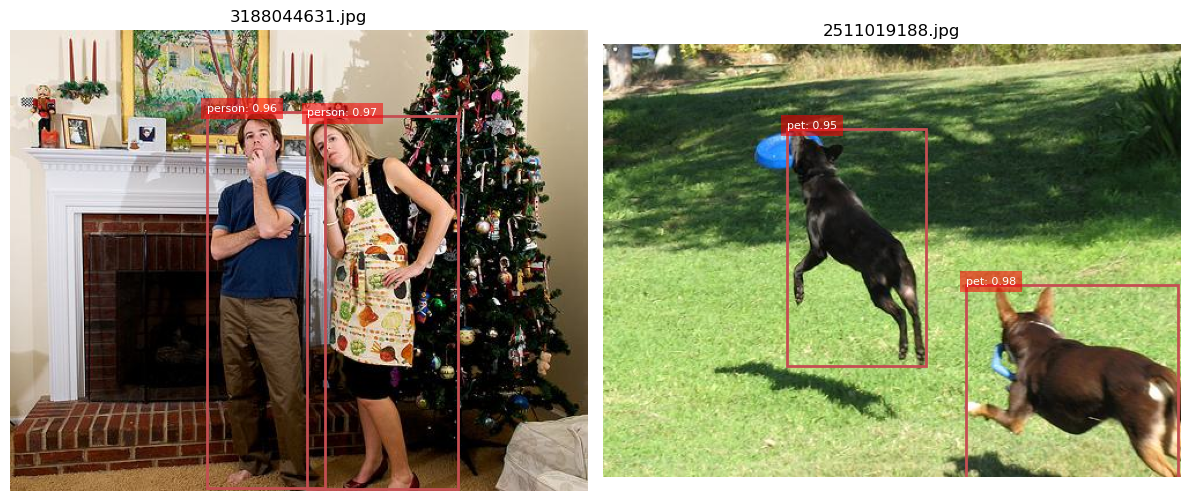

In [38]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_bbox(ax, image, data, title="YOLO Prediction"):
    """Plots bounding boxes on an image using Matplotlib."""
    ax.imshow(image)
    ax.set_title(title, fontsize=12)

    # Plot each bounding box
    for bbox, label, conf in zip(data['bboxes'], data['labels'], data['confidences']):
        x1, y1, x2, y2 = bbox
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        text = f"{label}: {conf:.2f}"
        ax.text(x1, y1, text, color='white', fontsize=8, 
                bbox=dict(facecolor='red', alpha=0.55, edgecolor='none'))

    ax.axis('off')

def get_predictions(image_path):
    """Runs YOLO inference and returns bounding box data."""
    image = cv2.imread(image_path)  
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    predictions = model.predict(source=image_path)

    data = {'bboxes': [], 'labels': [], 'confidences': []}

    for result in predictions:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
            class_id = int(box.cls[0])  # Class ID
            confidence = box.conf[0].item()  # Confidence score

            data['bboxes'].append((x1, y1, x2, y2))
            data['labels'].append(model.names[class_id])  
            data['confidences'].append(confidence)

    return image, data

# Define test images
test_images = [
    "datasets/flickr/images/val/3188044631.jpg",
    "datasets/flickr/images/val/2511019188.jpg"
]

# Run inference on both images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for ax, img_path in zip(axes, test_images):
    image, data = get_predictions(img_path)
    plot_bbox(ax, image, data, title=img_path.split("/")[-1])

plt.tight_layout()
plt.show()


In [6]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")

# Train the model
results = model.train(
    data="flickr.yaml",
    project="yolo11-flickr",
    name="yolo11-flickr",
    exist_ok=True,
    save_period=10,
    lr0=1e-4,
    batch=16,
    epochs=40,
)


New https://pypi.org/project/ultralytics/8.3.70 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.62  Python-3.9.21 torch-2.5.1 CUDA:0 (NVIDIA GeForce GTX 1080, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=flickr.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=10, cache=False, device=None, workers=8, project=yolo11-flickr, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/aiigoradam/yolo11-flickr/1ad11df339a944bf853bec0c0a05702a



Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


COMET WARNING: Unknown error exporting current conda environment
COMET WARNING: Unknown error retrieving Conda package as an explicit file
COMET WARNING: Unknown error retrieving Conda information


AMP: checks passed 


train: Scanning C:\Users\stopc\Desktop\CV_Project\datasets\flickr\labels\train... 1120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1120/1120 [00:00<00:00, 1479.77it/s]


train: New cache created: C:\Users\stopc\Desktop\CV_Project\datasets\flickr\labels\train.cache


val: Scanning C:\Users\stopc\Desktop\CV_Project\datasets\flickr\labels\val... 140 images, 0 backgrounds, 0 corrupt: 100%|██████████| 140/140 [00:00<00:00, 722.14it/s]

val: New cache created: C:\Users\stopc\Desktop\CV_Project\datasets\flickr\labels\val.cache


Plotting labels to yolo11-flickr\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to yolo11-flickr\train3
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      2.68G     0.8892      2.183      1.317         53        640: 100%|██████████| 70/70 [00:42<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.53s/it]

                   all        140        234      0.778      0.445      0.724      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      2.63G      1.117      1.705      1.456         75        640: 100%|██████████| 70/70 [00:24<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.89it/s]

                   all        140        234      0.667      0.403      0.457      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      2.63G      1.241      1.723      1.551         72        640: 100%|██████████| 70/70 [00:22<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.20it/s]

                   all        140        234      0.419      0.253      0.263      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      2.62G      1.261       1.68      1.549         60        640: 100%|██████████| 70/70 [00:23<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.73it/s]

                   all        140        234       0.56      0.645      0.625      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      2.65G      1.264      1.619      1.563         70        640: 100%|██████████| 70/70 [00:23<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.92it/s]

                   all        140        234      0.626      0.344      0.426      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      2.63G      1.216      1.528      1.508         74        640: 100%|██████████| 70/70 [00:22<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.07it/s]

                   all        140        234      0.624      0.415      0.458      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      2.63G      1.177      1.498      1.491         74        640: 100%|██████████| 70/70 [00:22<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.03it/s]

                   all        140        234       0.72      0.687       0.77      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      2.65G      1.161       1.41      1.477         70        640: 100%|██████████| 70/70 [00:22<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.80it/s]

                   all        140        234      0.705      0.712      0.769       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      2.62G      1.153      1.419       1.49         60        640: 100%|██████████| 70/70 [00:22<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.11it/s]

                   all        140        234      0.849      0.649      0.787      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      2.62G      1.102      1.298      1.441         60        640: 100%|██████████| 70/70 [00:22<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.85it/s]

                   all        140        234      0.685      0.717      0.711      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      2.62G      1.089      1.315      1.443         68        640: 100%|██████████| 70/70 [00:22<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.09it/s]

                   all        140        234      0.704       0.69      0.796      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      2.62G      1.065      1.288      1.421         67        640: 100%|██████████| 70/70 [00:23<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.77it/s]

                   all        140        234      0.603      0.725      0.739      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      2.62G      1.076      1.268      1.423         53        640: 100%|██████████| 70/70 [00:29<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.34it/s]

                   all        140        234      0.784      0.661      0.778      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      2.62G       1.05       1.22      1.403         57        640: 100%|██████████| 70/70 [00:29<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]

                   all        140        234      0.701      0.697        0.8      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40       2.6G      1.012      1.174      1.376         49        640: 100%|██████████| 70/70 [00:31<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.36it/s]

                   all        140        234      0.762      0.701      0.767      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      2.63G      1.007      1.177      1.378         65        640: 100%|██████████| 70/70 [00:28<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.32it/s]

                   all        140        234      0.801      0.735      0.813      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      2.64G     0.9843      1.142      1.359         62        640: 100%|██████████| 70/70 [00:27<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.54it/s]

                   all        140        234      0.823      0.759      0.845       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40       2.6G     0.9754      1.103      1.353         59        640: 100%|██████████| 70/70 [00:30<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.71it/s]

                   all        140        234      0.813      0.736      0.836      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      2.62G     0.9577      1.088       1.34         53        640: 100%|██████████| 70/70 [00:25<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.02it/s]

                   all        140        234      0.783       0.67      0.782      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      2.63G     0.9392      1.067      1.325         70        640: 100%|██████████| 70/70 [00:24<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.71it/s]

                   all        140        234      0.776      0.781      0.846       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      2.64G     0.9135      1.017      1.315         60        640: 100%|██████████| 70/70 [00:27<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.49it/s]

                   all        140        234      0.806      0.768      0.849      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40       2.6G     0.9279      1.054      1.331         67        640: 100%|██████████| 70/70 [00:26<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.75it/s]

                   all        140        234      0.898      0.794      0.886      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      2.62G     0.8777      1.007      1.288         58        640: 100%|██████████| 70/70 [00:28<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.29it/s]

                   all        140        234       0.82      0.787      0.863      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      2.63G     0.8616     0.9873      1.265         59        640: 100%|██████████| 70/70 [00:27<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.34it/s]

                   all        140        234       0.75      0.768      0.835      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      2.62G     0.8524     0.9514      1.274         63        640: 100%|██████████| 70/70 [00:26<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.43it/s]

                   all        140        234      0.879      0.739      0.874      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40       2.6G     0.8558     0.9384      1.282         55        640: 100%|██████████| 70/70 [00:25<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.25it/s]

                   all        140        234      0.891      0.819      0.908      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      2.64G     0.8305      0.933      1.263         60        640: 100%|██████████| 70/70 [00:25<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.65it/s]

                   all        140        234      0.786       0.84      0.881      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      2.61G     0.8118     0.9005      1.247         62        640: 100%|██████████| 70/70 [00:26<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.58it/s]

                   all        140        234      0.845      0.853      0.906      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      2.62G     0.8018     0.8947      1.244         61        640: 100%|██████████| 70/70 [00:28<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.09it/s]

                   all        140        234      0.876       0.82      0.917      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      2.63G     0.7882     0.8592      1.229         71        640: 100%|██████████| 70/70 [00:26<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.00it/s]

                   all        140        234      0.889      0.791       0.89      0.674


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40       2.6G     0.6884     0.8023      1.179         22        640: 100%|██████████| 70/70 [00:24<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.33it/s]

                   all        140        234      0.875      0.857      0.902      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40       2.6G     0.6776     0.7137      1.172         21        640: 100%|██████████| 70/70 [00:25<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]

                   all        140        234      0.895      0.855       0.92      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40       2.6G     0.6483     0.6559      1.145         29        640: 100%|██████████| 70/70 [00:23<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.75it/s]

                   all        140        234      0.894      0.796      0.908      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40       2.6G     0.6313     0.6493      1.144         28        640: 100%|██████████| 70/70 [00:25<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.48it/s]

                   all        140        234      0.887      0.815      0.903      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40       2.6G     0.6046     0.6151      1.116         27        640: 100%|██████████| 70/70 [00:23<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.05it/s]

                   all        140        234        0.9      0.836      0.912      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40       2.6G     0.5815     0.5822      1.085         22        640: 100%|██████████| 70/70 [00:22<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.62it/s]

                   all        140        234      0.852       0.85      0.903      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40       2.6G     0.5587     0.5625      1.079         27        640: 100%|██████████| 70/70 [00:28<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.89it/s]

                   all        140        234      0.939      0.814      0.905      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40       2.6G     0.5538     0.5568      1.067         24        640: 100%|██████████| 70/70 [00:24<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.27it/s]

                   all        140        234      0.934      0.786      0.904      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40       2.6G     0.5372     0.5315      1.061         31        640: 100%|██████████| 70/70 [00:23<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.59it/s]

                   all        140        234      0.885      0.823      0.905      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40       2.6G       0.53     0.5327      1.057         24        640: 100%|██████████| 70/70 [00:25<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.63it/s]

                   all        140        234      0.923      0.794      0.902      0.704



40 epochs completed in 0.333 hours.
Optimizer stripped from yolo11-flickr\train3\weights\last.pt, 5.5MB
Optimizer stripped from yolo11-flickr\train3\weights\best.pt, 5.5MB

Validating yolo11-flickr\train3\weights\best.pt...
Ultralytics 8.3.62  Python-3.9.21 torch-2.5.1 CUDA:0 (NVIDIA GeForce GTX 1080, 8192MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.12it/s]


                   all        140        234      0.935      0.786      0.903      0.708
                person         78        149      0.912      0.725      0.878      0.618
                   pet         70         85      0.958      0.847      0.929      0.797
Speed: 0.3ms preprocess, 4.1ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to yolo11-flickr\train3


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : uniform_omega_910
COMET INFO:     url                   : https://www.comet.com/aiigoradam/yolo11-flickr/1ad11df339a944bf853bec0c0a05702a
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [280]                : (14343.091796875, 5262300.5)
COMET INFO:     lr/pg0 [41]               : (5.792825000000004e-05, 0.0015769383404761906)
COMET INFO:     lr/pg1 [41]               : (5.792825000000004e-05, 0.0015769383404761906)
COMET INFO:     lr/pg2 [41]               : (5.792825000000004e-05, 0.0015769383404761906)
COMET INFO:     metrics/mAP50(B) [41]     : (0.26277, 0.91985)
COMET INFO:     metrics/mAP50-95(B) [41]  : (0.12559, 0.7075241377802